In [250]:
#Part 3.1
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_excel('GooglePlaystore.xlsx')
print(df.head())
for ind in df.index:
    if df['Reviews'][ind] == '3.0M':
        print('hit')
        df.drop(ind, axis =0, inplace= True)


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres         Last Updated         Current Ver  \
0               Art & Design  2018-01-07 00:00:00               1.0.0   
1  Art & Design;Pr

In [251]:
#Part 3.2
df = df.replace("Varies with device", np.nan).dropna(axis=0, how='any')



In [252]:
#Part 3.3

#import re

#print(df['Android Ver'])
#df['Android Ver'] = df['Android Ver'].str.extract('(\d+)', expand= False)
#print(df['Android Ver'])

In [253]:
#Part 3.4

df['Installs'] = df['Installs'].str.replace("+", "")
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df = df[df.notnull()]



/tmp/ipykernel_11381/2813006102.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace("+", "")


In [254]:
#Part 3.5 and 3.6

avgInstallsByCategory = df.groupby('Category')['Installs'].mean().round(2)

df = df[(df['Installs'] >= 50000) & (df['Reviews'] >= 100)]

for ind in df.index:
    if np.isnan(df['Installs'][ind]):
        df.at[ind, 'Installs'] = avgInstallsByCategory[df['Category'][ind]]

print(df['Size'])

for ind in df.index:
    if df['Size'][ind].endswith("M"):
        df.at[ind, 'Size'] = float(df['Size'][ind][:-1]) * 10 ** 6
    elif df['Size'][ind].endswith("K"):
        df.at[ind, 'Size'] = float(df['Size'][ind][:-1]) * 10 ** 3





print(df['Size'])


1         14M
2        8.7M
4        2.8M
5        5.6M
6         19M
         ... 
10814     31M
10815    4.9M
10817    8.0M
10830    2.3M
10832    582k
Name: Size, Length: 4918, dtype: object
1        14000000.0
2         8700000.0
4         2800000.0
5         5600000.0
6        19000000.0
            ...    
10814    31000000.0
10815     4900000.0
10817     8000000.0
10830     2300000.0
10832          582k
Name: Size, Length: 4918, dtype: object


In [255]:
#Part 3.1: Analysis
print(df.groupby('Category').describe())

                    Rating                                                    \
                     count      mean       std  min    25%   50%    75%  max   
Category                                                                       
ART_AND_DESIGN        38.0  4.318421  0.331137  3.4  4.100  4.35  4.600  4.8   
AUTO_AND_VEHICLES     41.0  4.268293  0.395878  3.2  4.000  4.30  4.500  4.9   
BEAUTY                20.0  4.330000  0.341976  3.7  4.075  4.35  4.625  4.9   
BOOKS_AND_REFERENCE   78.0  4.378205  0.354799  3.3  4.200  4.50  4.600  4.9   
BUSINESS             109.0  4.210092  0.409142  2.7  4.100  4.30  4.500  4.8   
COMICS                30.0  4.146667  0.510398  3.2  3.825  4.30  4.575  4.8   
COMMUNICATION        134.0  4.171642  0.307454  3.0  4.000  4.20  4.400  4.8   
DATING               107.0  3.901869  0.568178  1.9  3.650  4.10  4.200  4.8   
EDUCATION            101.0  4.402970  0.245135  3.5  4.300  4.40  4.600  4.9   
ENTERTAINMENT         85.0  4.143529  0.

In [256]:
#Part 3.2: Analysis
def extract(column_name):
    df_to_return = pd.DataFrame(data=None, columns = ['Category', 'App', column_name])
    highest = free_df[column_name].nlargest(3)
   
    for ind in highest.index:
        dict = {
            'Category': free_df['Category'][ind],
            'App': free_df['App'][ind],
            column_name: free_df[column_name][ind]
        }
        
        df_to_return = df_to_return.append(dict, ignore_index = True)
    return df_to_return


free_df = df[df['Type'] == 'Free']
ratingDF = extract('Rating')
print(ratingDF)
installsDF = extract('Installs')
print(installsDF)
reviewsDF = extract('Reviews')
print(reviewsDF)
    

            Category                                                App  \
0  AUTO_AND_VEHICLES  Tickets SDA 2018 and Exam from the State Traff...   
1  AUTO_AND_VEHICLES                     CDL Practice Test 2018 Edition   
2  AUTO_AND_VEHICLES              DMV Permit Practice Test 2018 Edition   

   Rating  
0     4.9  
1     4.9  
2     4.9  
  Category             App    Installs
0     GAME  Subway Surfers  1000000000
1     GAME  Subway Surfers  1000000000
2     GAME  Subway Surfers  1000000000
  Category             App   Reviews
0     GAME  Clash of Clans  44893888
1     GAME  Clash of Clans  44891723
2     GAME  Clash of Clans  44891723


/tmp/ipykernel_11381/180335734.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_to_return = df_to_return.append(dict, ignore_index = True)
/tmp/ipykernel_11381/180335734.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_to_return = df_to_return.append(dict, ignore_index = True)
/tmp/ipykernel_11381/180335734.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_to_return = df_to_return.append(dict, ignore_index = True)
/tmp/ipykernel_11381/180335734.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_to_return = df_to_return.append(dict, ignore_index = True)
/tmp/ipykernel_11381/180335734.py:13: FutureWarning: The fra

In [257]:
#Part 3.3

paid_df = df[df['Type'] != 'Free']
print(paid_df['Price'].mean())
print(paid_df['Price'].max())
print(paid_df['Price'].min())

10.638195488721806
399.99
0.99


1        Art & Design;Pretend Play
2                     Art & Design
4          Art & Design;Creativity
5                     Art & Design
6                     Art & Design
                   ...            
10814                Entertainment
10815            Books & Reference
10817                        Tools
10830             News & Magazines
10832                      Weather
Name: Genres, Length: 4918, dtype: object


<AxesSubplot: ylabel='App'>

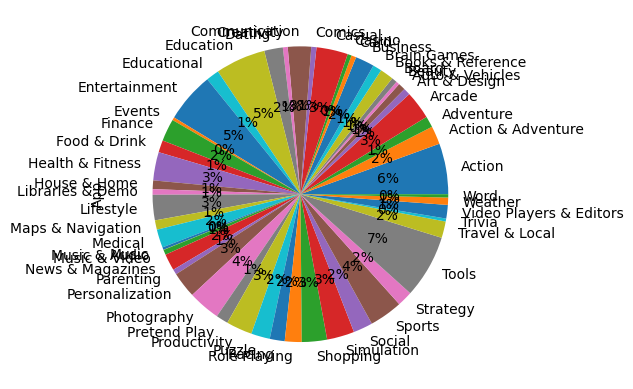

In [258]:
#Part 3.1: Visualization

print(df['Genres'])
for ind in df.index:
    if df['Genres'][ind].find(';') != -1:
        lis = df['Genres'][ind].split(';')
        df.at[ind, 'Genres'] = lis
df = df.explode('Genres')

genresCount = df.groupby('Genres')['App'].count()
genresCount.plot(kind = 'pie', y = 'Percentage of each Genre', autopct = '%1.0f%%')


